In [22]:
import docx2txt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import os
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

In [23]:
file = os.path.join('../reference/live_nation_press_release.docx')
file

'../reference/live_nation_press_release.docx'

In [24]:
# read in word file
result = docx2txt.process(file)


In [25]:
from collections import defaultdict

import pandas as pd

text_list = [result]

word_freq = defaultdict(int)

#The word_tokenize() function will break our text phrases into individual words.
# tokens = word_tokenize(text_list)

#We'll create a new list that contains punctuation we wish to clean.
punctuations = ['(',')',';',':','[',']',',']

#We initialize the stopwords variable, which is a list of words like "The," "I," "and," etc. that don't hold much value as keywords.
stop_words = stopwords.words('english')

#keywords = [word for word in text_list[0] if not word.lower() in stop_words or not word in punctuations]

keywords = []
for word in text_list[0].split():
    if word.lower() in stop_words or word in punctuations:
    #if not word.lower() in stop_words or not word in punctuations:
        pass
    else:
        keywords.append(word)

for words in keywords:
   # for word in words.split():
    word_freq[words] += 1
        

word_frequency = pd.DataFrame.from_dict(word_freq, orient='index') \
.sort_values(0, ascending=False) \
.rename(columns={0: 'abs_freq'})

word_frequency

,abs_freq
concerts,8
Live,8
fans,8
financial,6
live,4
...,...
"shows,",1
returning,1
requirements,1
America,1


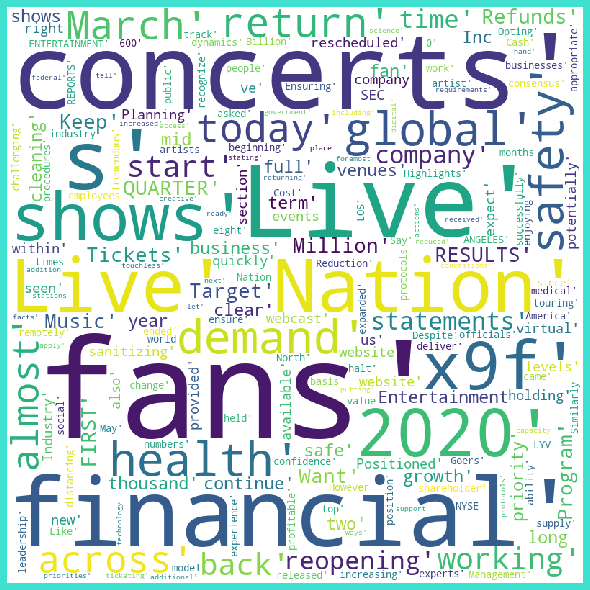

In [28]:
# comment_words = '' 
stopwords = set(STOPWORDS) 
  
# # iterate through the csv file 
# for val in word_frequency: 
      
#     # typecaste each val to string 
#     val = str(val) 
  
#     # split the value 
#     tokens = val.split() 
      
#     # Converts each token into lowercase 
#     for i in range(len(tokens)): 
#         tokens[i] = tokens[i].lower() 
      
#     comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(str(keywords))
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = 'turquoise') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()